# Support Vector Machines

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

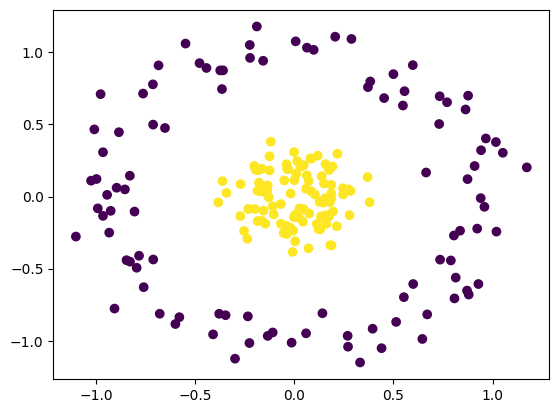

In [17]:
from sklearn.datasets._samples_generator import make_circles
x, y = make_circles(200, factor=.2, noise=.1)
plt.scatter(x[:,0], x[:,1], c=y)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [20]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [63]:
pred = svc.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.575

In [22]:
from matplotlib.colors import ListedColormap

In [29]:
zero_one_colourmap = ListedColormap(('lightgreen', 'pink'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

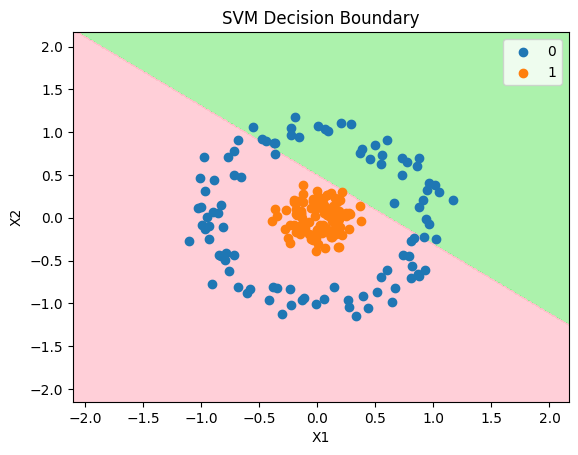

In [30]:
plot_decision_boundary(x, y, svc)

In [61]:
import plotly.express as px
def plot_3d_plot(X, y):
    # Radial Basis Function (RBF)
    r = np.exp(-(X ** 2).sum(1))

    ax = px.scatter_3d(
        x = X[:, 0], 
        y = X[:, 1], 
        z = r,
        color= y,
        color_continuous_scale=px.colors.sequential.Turbo,
        opacity=0.6
    )

    ax.show()

In [62]:
plot_3d_plot(x, y)

In [65]:
svc2 = SVC(kernel='rbf')
svc2.fit(x_train, y_train)
pred = svc2.predict(x_test)
accuracy_score(y_test, pred)

1.0

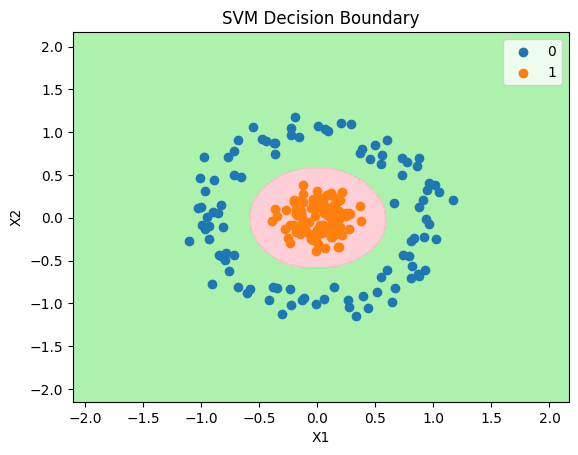

In [66]:
plot_decision_boundary(x, y, svc2)

In [68]:
for i in range(1, 10):
    svc3 = SVC(kernel='poly', degree=i)
    svc3.fit(x_train, y_train)
    pred = svc3.predict(x_test)
    print(accuracy_score(y_test, pred), i)

0.575 1
1.0 2
0.525 3
1.0 4
0.55 5
1.0 6
0.5 7
1.0 8
0.525 9
